# *description of data*

| **Attribute**             | **Description**                                              |
|---------------------------|--------------------------------------------------------------|
| Booking ID                | Unique reservation code.                                     |
| Adults                    | Number of adults.                                            |
| Children                  | Number of children.                                          |
| Weekend Nights            | Nights (Sat/Sun) stayed or booked.                           |
| Week Nights               | Nights (Mon-Fri) stayed or booked.                           |
| Meal Type                 | Chosen meal plan category.                                   |
| Parking                   | Car parking request (0 - No, 1 - Yes).                       |
| Room Type                 | Reserved room category (coded by INN Hotels).                |
| Lead Time                 | Days between booking and arrival.                            |
| Market Segment            | Market segment designation.                                  |
| Repeated Guest            | Repeated guest status (0 - No, 1 - Yes).                     |
| Previous Cancellations    | Prior bookings canceled by the customer.                     |
| Previous Non-Cancellations| Prior bookings not canceled by the customer.                 |
| Average Price             | Average daily rate in euros.                                 |
| Special Requests          | Total special requests made by the customer.                 |
| Booking Status            | Reservation status flag (canceled or not).                   |


## **Import libraries**

In [125]:
# Import necessary libraries
import pandas as pd  # For handling and manipulating data using DataFrames
import numpy as np  # For numerical operations and array handling
import seaborn as sns  # For creating appealing visualizations
sns.set(style="whitegrid")  # Set the style for Seaborn visualizations
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import LabelEncoder  # For encoding categorical variables
from sklearn.preprocessing import MinMaxScaler  # For scaling numerical features to a specified range


# **Reading Data**

In [126]:
data=pd.read_csv('first inten project.csv')

In [127]:
#change columns name
data.columns=['id','adults','children','weekend_nights','week_night','meal','parking','room_type','lead_time','market','repeated','canceled_book','not canceled_book','price','special_requests','date','output']

In [128]:
data.head()

,id,adults,children,weekend_nights,week_night,meal,parking,room_type,lead_time,market,repeated,canceled_book,not canceled_book,price,special_requests,date,output
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [129]:
data.tail()

,id,adults,children,weekend_nights,week_night,meal,parking,room_type,lead_time,market,repeated,canceled_book,not canceled_book,price,special_requests,date,output
36280,INN36282,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,9/13/2018,Canceled
36281,INN36283,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled
36284,INN36286,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,Online,0,0,0,133.44,3,10/18/2018,Not_Canceled


In [130]:
data.shape

(36285, 17)

In [131]:
# Check the number of missing values in each column
data.isnull().sum()

id                   0
adults               0
children             0
weekend_nights       0
week_night           0
meal                 0
parking              0
room_type            0
lead_time            0
market               0
repeated             0
canceled_book        0
not canceled_book    0
price                0
special_requests     0
date                 0
output               0
dtype: int64

In [132]:
# Count the number of duplicated rows in the DataFrame
data.duplicated().sum()

0

## **Cleaning**

In [133]:
# Retrieve the column names of the DataFrame
data.columns

Index(['id', 'adults', 'children', 'weekend_nights', 'week_night', 'meal',
       'parking', 'room_type', 'lead_time', 'market', 'repeated',
       'canceled_book', 'not canceled_book', 'price', 'special_requests',
       'date', 'output'],
      dtype='object')

In [134]:
# Remove columns 'id' and 'date' from the DataFrame
data.drop(["id", 'date'], axis=1, inplace=True)

In [135]:
# Get the count of each unique value in the 'adults' column
data['adults'].value_counts()

adults
2    26110
1     7702
3     2318
0      139
4       16
Name: count, dtype: int64

In [136]:
# Filter the DataFrame to exclude rows where the 'adults' column is either 0 or 4
data = data.query("adults not in [0, 4]")

In [137]:
# Get the count of each unique value in the 'children' column
data['children'].value_counts()


children
0     33567
1      1621
2       925
3        14
9         2
10        1
Name: count, dtype: int64

In [138]:
# Filter the DataFrame to exclude rows where the 'children' column is 10, 9, or 3
data = data.query("children not in [10, 9, 3]")

In [139]:
# Get the count of each unique value in the 'weekend_nights' column
data['weekend_nights'].value_counts()

weekend_nights
0    16797
1     9964
2     9016
3      152
4      129
5       34
6       20
7        1
Name: count, dtype: int64

In [140]:
# Get the count of each unique value in the 'week_night' column
data['week_night'].value_counts()

week_night
2     11400
1      9442
3      7793
4      2980
0      2379
5      1608
6       189
7       113
8        62
10       61
9        33
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: count, dtype: int64

In [141]:
# Filter the DataFrame to exclude rows where the 'week_night' column is 16, 17, 13, 14, or 12
data = data.query("week_night not in [16, 17, 13, 14, 12]")

In [142]:
# Get the count of each unique value in the 'meal' column
data['meal'].value_counts()

meal
Meal Plan 1     27655
Not Selected     5125
Meal Plan 2      3302
Meal Plan 3         5
Name: count, dtype: int64

In [143]:
# Filter the DataFrame to exclude rows where the 'meal' column is 'Meal Plan 3'
data = data.query("meal not in ['Meal Plan 3']")

In [144]:
# Get the count of each unique value in the 'canceled_book' column
data['canceled_book'].value_counts()

canceled_book
0     35744
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: count, dtype: int64

In [145]:
# Filter the DataFrame to exclude rows where the 'canceled_book' column is 6, 13, 4, 5, or 11
data = data.query("canceled_book not in [6, 13, 4, 5, 11]")

In [146]:
# Get the count of each unique value in the 'parking' column
data['parking'].value_counts()

parking
0    34916
1     1115
Name: count, dtype: int64

In [147]:
# Get the count of each unique value in the 'room_type' column
data['room_type'].value_counts()

room_type
Room_Type 1    28072
Room_Type 4     6046
Room_Type 6      958
Room_Type 2      557
Room_Type 5      263
Room_Type 7      128
Room_Type 3        7
Name: count, dtype: int64

In [148]:
# Filter the DataFrame to exclude rows where the 'room_type' column is 'Room_Type 3'
data = data.query("room_type not in ['Room_Type 3']")

In [149]:
# Get the count of each unique value in the 'market' column
data['market'].value_counts()

market
Online           23009
Offline          10521
Corporate         1997
Complementary      372
Aviation           125
Name: count, dtype: int64

In [150]:
# Filter the DataFrame to exclude rows where the 'market' column is 'Complementary' or 'Aviation'
data = data.query("market not in ['Complementary', 'Aviation']")

In [151]:
# Get the count of each unique value in the 'repeated' column
data['repeated'].value_counts()

repeated
0    34784
1      743
Name: count, dtype: int64

In [152]:
# Filter the DataFrame to exclude rows where the 'repeated' column is 1
data = data.query("repeated not in [1]")

In [153]:
# Get the count of each unique value in the 'not canceled_book' column
data['not canceled_book'].value_counts()

not canceled_book
0    34784
Name: count, dtype: int64

In [154]:
# Get the count of each unique value in the 'special_requests' column
data['special_requests'].value_counts()

special_requests
0    18929
1    10898
2     4241
3      644
4       64
5        8
Name: count, dtype: int64

In [155]:
# Filter the DataFrame to exclude rows where the 'special_requests' column is 5 or 4
data = data.query("special_requests not in [5, 4]")

In [156]:
data.shape              

(34712, 15)

## **EDA**

In [157]:
# Display concise summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34712 entries, 0 to 36284
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   adults             34712 non-null  int64  
 1   children           34712 non-null  int64  
 2   weekend_nights     34712 non-null  int64  
 3   week_night         34712 non-null  int64  
 4   meal               34712 non-null  object 
 5   parking            34712 non-null  int64  
 6   room_type          34712 non-null  object 
 7   lead_time          34712 non-null  int64  
 8   market             34712 non-null  object 
 9   repeated           34712 non-null  int64  
 10  canceled_book      34712 non-null  int64  
 11  not canceled_book  34712 non-null  int64  
 12  price              34712 non-null  float64
 13  special_requests   34712 non-null  int64  
 14  output             34712 non-null  object 
dtypes: float64(1), int64(10), object(4)
memory usage: 4.2+ MB


In [158]:
# Display descriptive statistics of the DataFrame
data.describe()

,adults,children,weekend_nights,week_night,parking,lead_time,repeated,canceled_book,not canceled_book,price,special_requests
count,34712.000000,34712.000000,34712.000000,34712.000000,34712.000000,34712.000000,34712.0,34712.0,34712.0,34712.000000,34712.000000
mean,1.872119,0.098208,0.817671,2.221681,0.027512,87.959236,0.0,0.0,0.0,105.156783,0.613966
std,0.493901,0.375498,0.860214,1.367728,0.163572,86.176448,0.0,0.0,0.0,33.441488,0.769869
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,20.000000,0.0,0.0,0.0,81.250000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,61.000000,0.0,0.0,0.0,100.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,131.000000,0.0,0.0,0.0,121.500000,1.000000
max,3.000000,2.000000,6.000000,15.000000,1.000000,443.000000,0.0,0.0,0.0,540.000000,3.000000


In [159]:
# Convert the 'price' column to integer type
data['price'] = data['price'].astype(int)

In [160]:
# Count the number of missing values in each column
data.isna().sum()

adults               0
children             0
weekend_nights       0
week_night           0
meal                 0
parking              0
room_type            0
lead_time            0
market               0
repeated             0
canceled_book        0
not canceled_book    0
price                0
special_requests     0
output               0
dtype: int64

In [161]:
# Select columns with object data type and display the first few rows
data.select_dtypes('object').head()

,meal,room_type,market,output
0,Meal Plan 1,Room_Type 1,Offline,Not_Canceled
1,Not Selected,Room_Type 1,Online,Not_Canceled
2,Meal Plan 1,Room_Type 1,Online,Canceled
3,Meal Plan 1,Room_Type 1,Online,Canceled
4,Not Selected,Room_Type 1,Online,Canceled


In [162]:
# Print the number of unique values for selected columns
for i in ['meal', 'room_type', 'market', 'output']:
    print(i, ':', data[i].nunique())

meal : 3
room_type : 6
market : 3
output : 2


# **handeling outliers**

In [163]:
data.shape

(34712, 15)

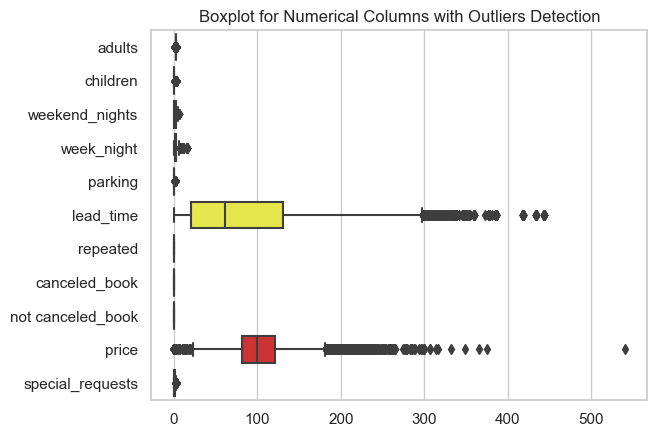

In [164]:
# Create a horizontal boxplot to visualize numerical data and identify outliers
sns.boxplot(data=data, orient='h', palette='Set1')
plt.title('Boxplot for Numerical Columns with Outliers Detection')
plt.show()

In [165]:
def handle_outliers(data, method='iqr', threshold=1.5, columns=None):
    """
    Handle outliers in numerical columns of a DataFrame.

    Parameters:
    - data: DataFrame or Series
    - method: 'iqr' for interquartile range, 'z-score' for z-score method
    - threshold: Number of standard deviations for z-score method or a multiplier for IQR method
    - columns: List of columns to handle outliers (default is all columns)

    Returns:
    DataFrame or Series without outliers based on the specified method and threshold.
    """
    if columns is None:
        columns = data.columns if isinstance(data, pd.DataFrame) else [data.name]

    if method == 'iqr':
        for column in columns:
            q1 = data[column].quantile(0.25)
            q3 = data[column].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr
            data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    elif method == 'z-score':
        for column in columns:
            z_scores = np.abs((data[column] - data[column].mean()) / data[column].std())
            data = data[z_scores <= threshold]

    return data


In [166]:
# Handle outliers in the 'price' and 'lead_time' columns using z-score method
data = handle_outliers(data, method='z-score', columns=['price', 'lead_time'], threshold=1.5)

In [167]:
data.shape

(28385, 15)

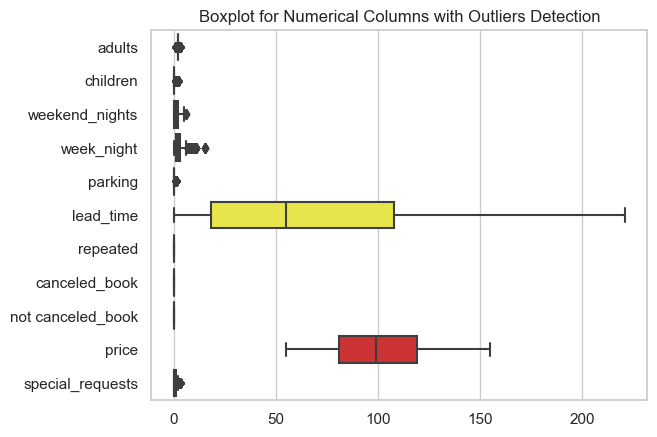

In [168]:
# Create a horizontal boxplot to visualize numerical data and identify outliers
sns.boxplot(data=data, orient='h', palette='Set1')
plt.title('Boxplot for Numerical Columns with Outliers Detection')
plt.show()


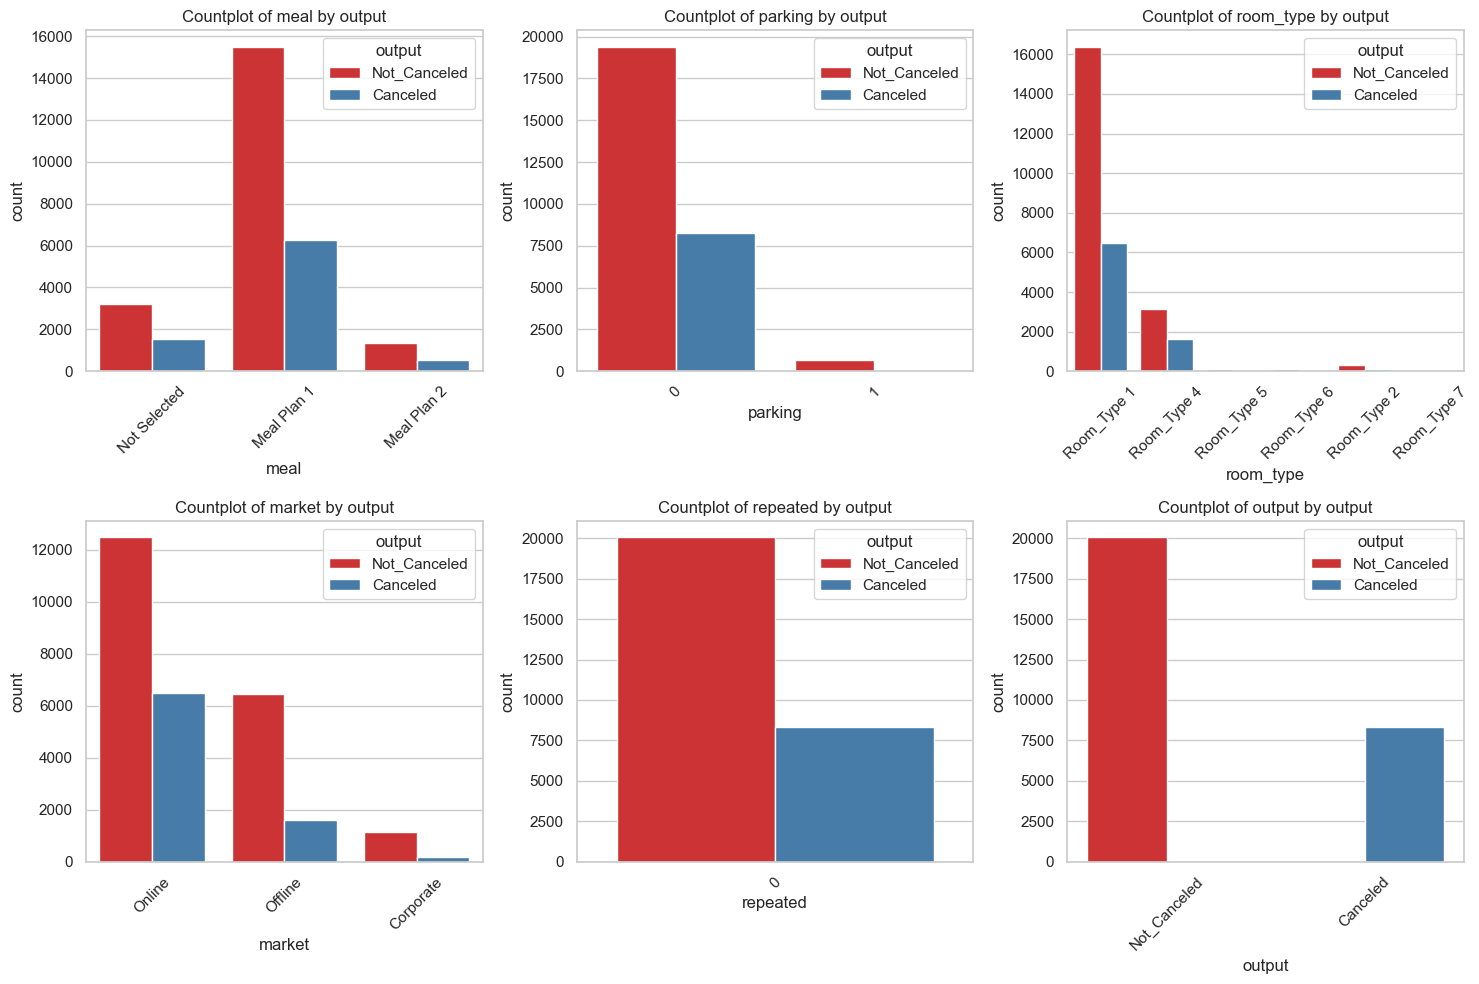

In [169]:
# List of categorical columns to visualize
categorical_columns = ['meal', 'parking', 'room_type', 'market', 'repeated', 'output']

# Set the figure size
plt.figure(figsize=(15, 10))

# Loop through each categorical column and create a countplot
for i, column in enumerate(categorical_columns, 1):
    # Create a subplot in a 2x3 grid
    plt.subplot(2, 3, i)
    
    # Create a countplot for the current categorical column, with hue 'output'
    sns.countplot(x=column, data=data, hue='output', palette='Set1')
    
    # Set the title for the subplot
    plt.title(f'Countplot of {column} by output')
    
    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

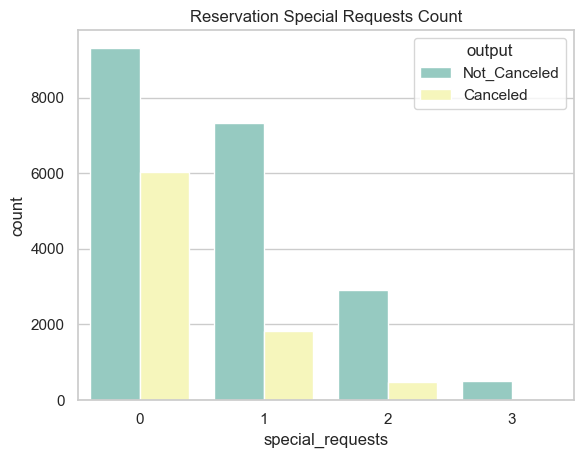

In [170]:
# Create a countplot for 'special_requests' with hue 'output' using Seaborn
ax = sns.countplot(data=data, x='special_requests', hue='output', palette='Set3')

# Set the title for the countplot
ax.set_title('Reservation Special Requests Count')

# Show the plot
plt.show()

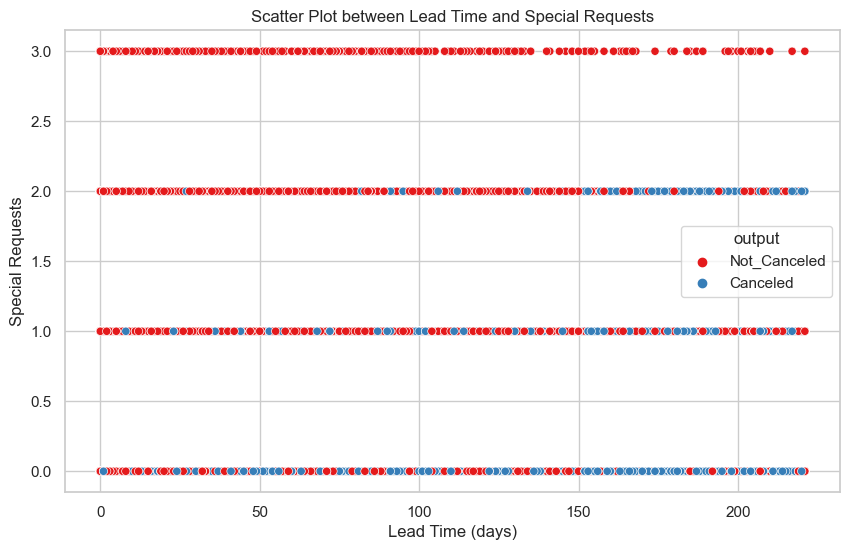

In [171]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a scatter plot for 'lead_time' vs 'special_requests' with hue 'output' using Seaborn
sns.scatterplot(data=data, x="lead_time", y='special_requests', hue='output', palette='Set1')

# Set the title for the scatter plot
plt.title('Scatter Plot between Lead Time and Special Requests')

# Set labels for x and y axes
plt.xlabel('Lead Time (days)')
plt.ylabel('Special Requests')

# Show the plot
plt.show()

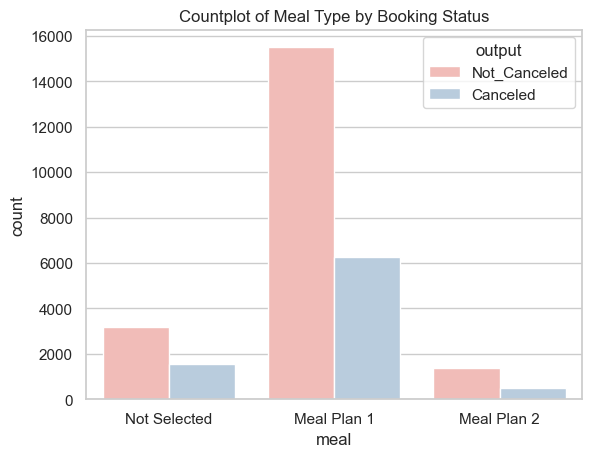

In [172]:
# Define a custom color palette (Pastel1)
custom_palette = sns.color_palette("Pastel1")

# Create a countplot for 'meal' with hue 'output' using Seaborn
sns.countplot(x='meal', hue='output', data=data, palette=custom_palette)

# Set the title for the countplot
plt.title('Countplot of Meal Type by Booking Status')

# Show the plot
plt.show()

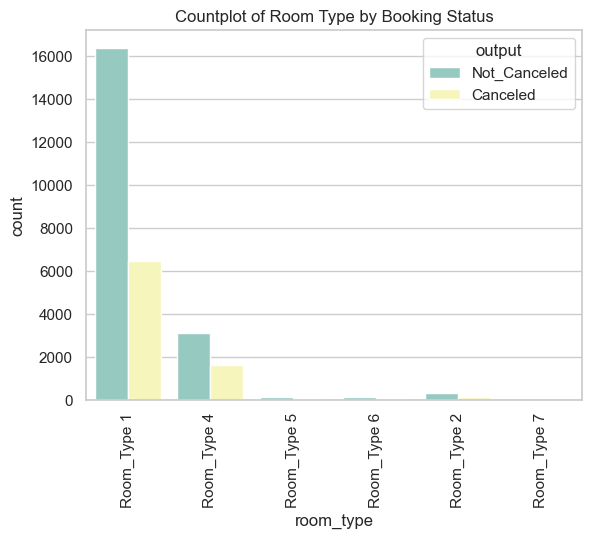

In [173]:
# Define a custom color palette (Set3)
custom_palette = sns.color_palette("Set3")

# Create a countplot for 'room_type' with hue 'output' using Seaborn
sns.countplot(x='room_type', hue='output', data=data, palette=custom_palette)

# Set the title for the countplot
plt.title('Countplot of Room Type by Booking Status')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()

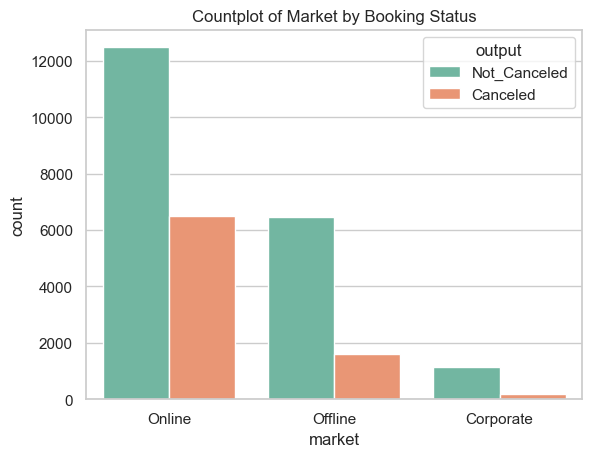

In [174]:
# Define a custom color palette (Set2)
custom_palette = sns.color_palette("Set2")

# Create a countplot for 'market' with hue 'output' using Seaborn
sns.countplot(x='market', hue='output', data=data, palette=custom_palette)

# Set the title for the countplot
plt.title('Countplot of Market by Booking Status')

# Show the plot
plt.show()

__________________________________________________________________


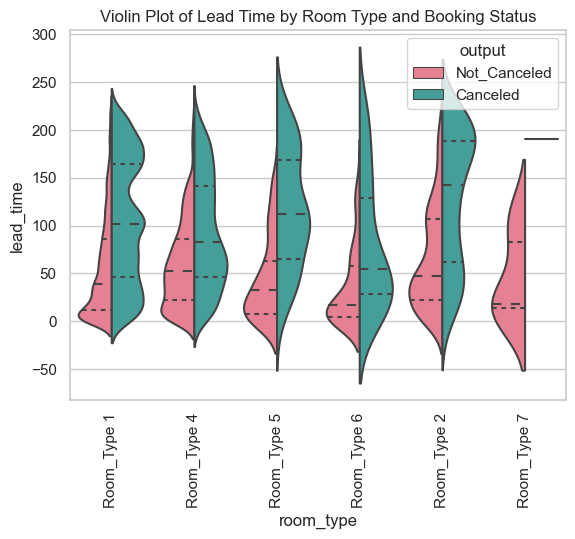

In [175]:
# Violin plot with customized appearance
sns.violinplot(x='room_type', y='lead_time', data=data, hue='output', split=True,
               palette='husl', inner='quartile', scale='width')
plt.xticks(rotation=90)
plt.title('Violin Plot of Lead Time by Room Type and Booking Status')
plt.show()


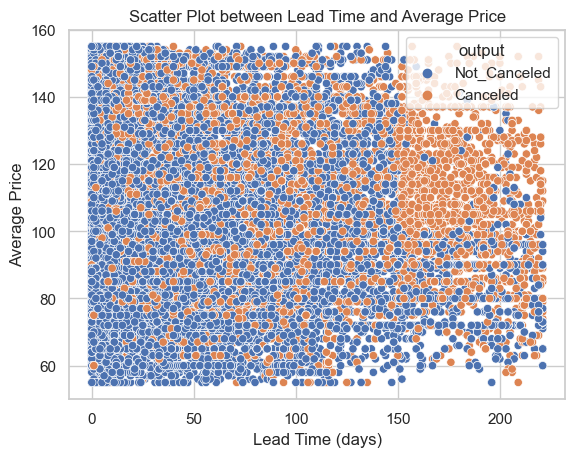

In [176]:
# Create a scatter plot for 'lead_time' vs 'price' with hue 'output' using Seaborn
sns.scatterplot(x='lead_time', y='price', data=data, hue='output')

# Set the title for the scatter plot
plt.title('Scatter Plot between Lead Time and Average Price')

# Set labels for x and y axes
plt.xlabel('Lead Time (days)')
plt.ylabel('Average Price')

# Show the plot
plt.show()

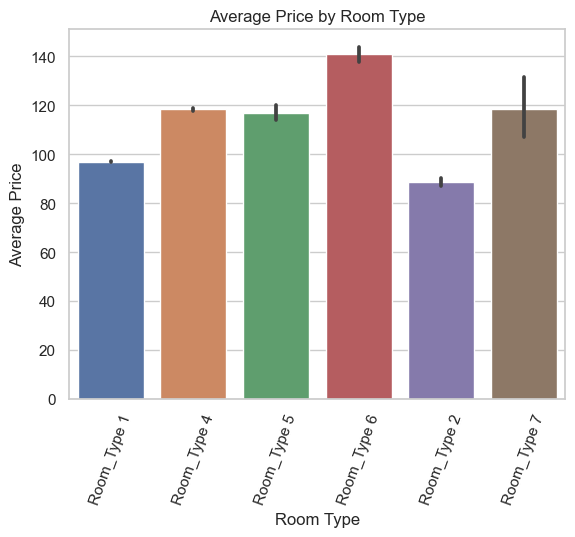

In [177]:
# Create a bar plot for average price by room type using Seaborn
sns.barplot(x='room_type', y='price', data=data)

# Set the title for the bar plot
plt.title('Average Price by Room Type')

# Set labels for x and y axes
plt.xlabel('Room Type')
plt.ylabel('Average Price')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=70)

# Show the plot
plt.show()

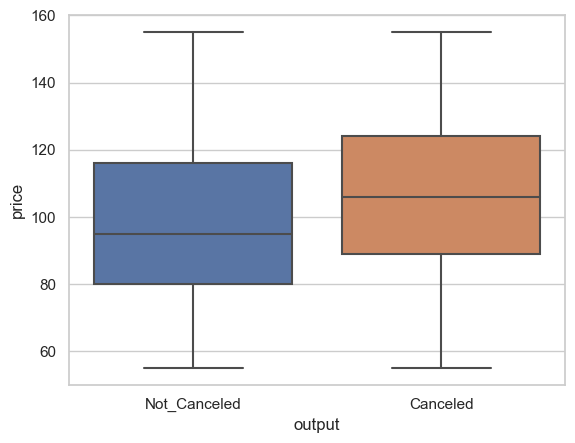

In [178]:
sns.boxplot(x='output', y='price', data=data)
plt.show()

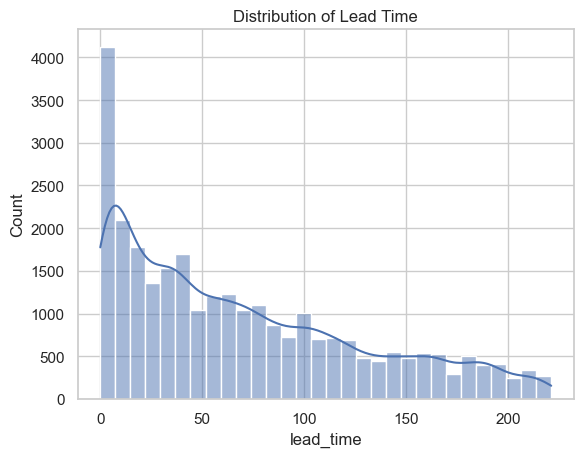

In [179]:
# Create a histogram for the distribution of lead time using Seaborn
sns.histplot(data['lead_time'], bins=30, kde=True)

# Set the title for the histogram
plt.title('Distribution of Lead Time')

# Show the plot
plt.show()

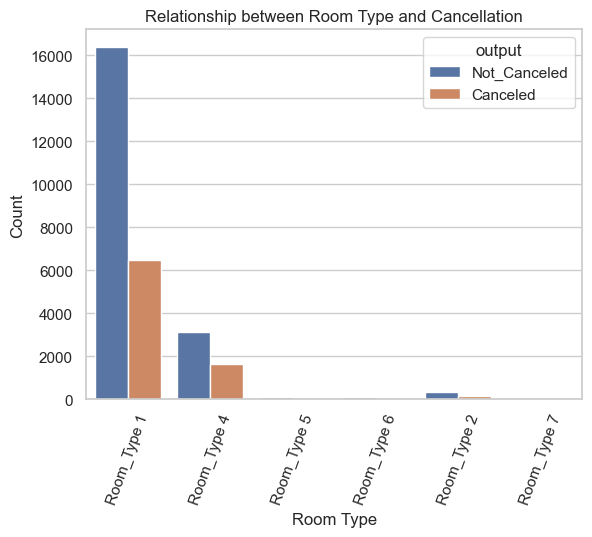

In [180]:
# Create a countplot for the relationship between room type and cancellation using Seaborn
sns.countplot(x='room_type', hue='output', data=data)

# Set the title for the countplot
plt.title('Relationship between Room Type and Cancellation')

# Set labels for x and y axes
plt.xlabel('Room Type')
plt.ylabel('Count')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=70)

# Show the plot
plt.show()

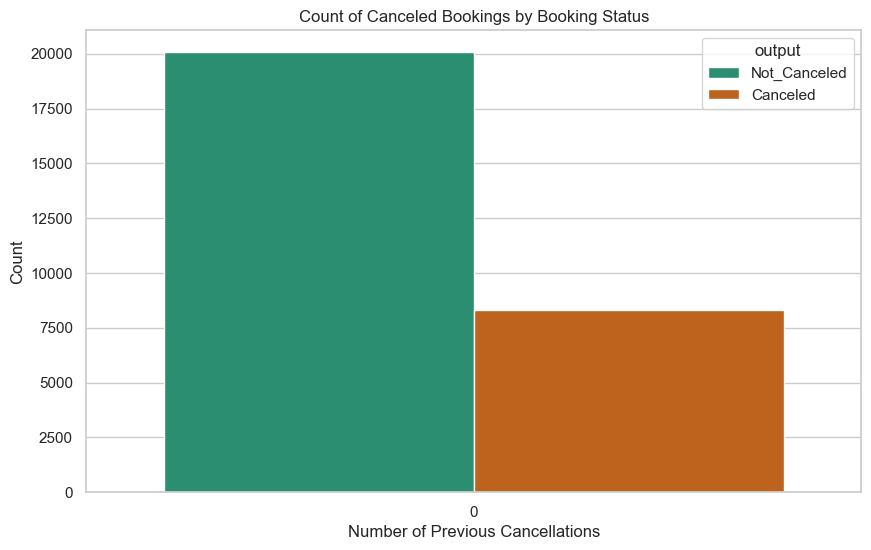

In [181]:
# Improved styling with a different color palette
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x='canceled_book', hue='output', palette='Dark2')

# Set the title of the plot
ax.set_title('Count of Canceled Bookings by Booking Status')

# Set labels for the axes
plt.xlabel('Number of Previous Cancellations')
plt.ylabel('Count')

# Display the plot
plt.show()


## **Encoding**

In [182]:
# Encode categorical columns using LabelEncoder
for col in data.select_dtypes('object').columns:
    data[col] = LabelEncoder().fit_transform(data[col])

In [183]:
data.columns

Index(['adults', 'children', 'weekend_nights', 'week_night', 'meal', 'parking',
       'room_type', 'lead_time', 'market', 'repeated', 'canceled_book',
       'not canceled_book', 'price', 'special_requests', 'output'],
      dtype='object')

In [184]:
data

,adults,children,weekend_nights,week_night,meal,parking,room_type,lead_time,market,repeated,canceled_book,not canceled_book,price,special_requests,output
1,1,0,1,3,2,0,0,5,2,0,0,0,106,1,1
3,1,0,0,2,0,0,0,211,2,0,0,0,100,1,0
4,1,0,1,2,2,0,0,48,2,0,0,0,77,0,0
6,1,1,1,4,0,0,0,34,2,0,0,0,107,1,1
7,3,0,1,3,0,0,2,83,2,0,0,0,105,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36279,2,0,1,1,2,0,0,48,2,0,0,0,94,0,0
36281,2,0,1,3,0,0,0,34,2,0,0,0,107,1,1
36282,2,0,1,3,0,0,2,83,2,0,0,0,105,1,1
36283,3,0,0,4,0,0,0,121,1,0,0,0,96,1,1


## **Rescaling**

In [185]:
# Rescale numerical columns using MinMaxScaler
cols_to_rescale = data.columns
data[cols_to_rescale] = MinMaxScaler().fit_transform(data[cols_to_rescale])

In [186]:
data

,adults,children,weekend_nights,week_night,meal,parking,room_type,lead_time,market,repeated,canceled_book,not canceled_book,price,special_requests,output
1,0.0,0.0,0.166667,0.200000,1.0,0.0,0.0,0.022624,1.0,0.0,0.0,0.0,0.51,0.333333,1.0
3,0.0,0.0,0.000000,0.133333,0.0,0.0,0.0,0.954751,1.0,0.0,0.0,0.0,0.45,0.333333,0.0
4,0.0,0.0,0.166667,0.133333,1.0,0.0,0.0,0.217195,1.0,0.0,0.0,0.0,0.22,0.000000,0.0
6,0.0,0.5,0.166667,0.266667,0.0,0.0,0.0,0.153846,1.0,0.0,0.0,0.0,0.52,0.333333,1.0
7,1.0,0.0,0.166667,0.200000,0.0,0.0,0.4,0.375566,1.0,0.0,0.0,0.0,0.50,0.333333,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36279,0.5,0.0,0.166667,0.066667,1.0,0.0,0.0,0.217195,1.0,0.0,0.0,0.0,0.39,0.000000,0.0
36281,0.5,0.0,0.166667,0.200000,0.0,0.0,0.0,0.153846,1.0,0.0,0.0,0.0,0.52,0.333333,1.0
36282,0.5,0.0,0.166667,0.200000,0.0,0.0,0.4,0.375566,1.0,0.0,0.0,0.0,0.50,0.333333,1.0
36283,1.0,0.0,0.000000,0.266667,0.0,0.0,0.0,0.547511,0.5,0.0,0.0,0.0,0.41,0.333333,1.0


## **Features engineering**

In [187]:
# Create a new column 'num_of_people' by adding 'adults' and 'children' columns
data['num_of_people'] = data['adults'] + data['children']

In [188]:
# Drop the 'adults' and 'children' columns from the DataFrame
data.drop(['adults', 'children'], axis=1, inplace=True)

In [189]:
# Drop the 'not canceled_book' column from the DataFrame
data.drop('not canceled_book',axis=1,inplace=True)

In [190]:
data.columns

Index(['weekend_nights', 'week_night', 'meal', 'parking', 'room_type',
       'lead_time', 'market', 'repeated', 'canceled_book', 'price',
       'special_requests', 'output', 'num_of_people'],
      dtype='object')

## **Splitting**

In [191]:
# Separate the features (X) and the target variable (y)
x = data.drop('output', axis=1)
y = data['output']

In [192]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)